## 目的
学習用の画像データセット2,000枚（0〜9の手話数字/各200枚）を使い、KerasのApplicationsAPIを利用して推論を行います。

VGG16モデルをTensorflow.jsで読み込み可能な形式に変換します。

## 事前準備
ここではGoogleColaboratoryを使います。

ランタイム接続後、左メニュー>ファイル>アップロード よりレポジトリにある画像データセット（Dataset)をアップロードしてください。

GoogleColaboratoryには必要なPythonモジュールがほぼプリオインストールしていますが、Keras.jsモジュールは無いため手動でインストールします。

VGG16モデルをそれなりに多いデータセットで学習するため ランタイム>ランタイムのタイプを変更>ハードウェアのアクセラレータ>GPU として下さい。

## データセットの振り分け

データセットを0〜9それぞれ訓練データ100枚、検証データ50枚、テストデータ50枚に振り分けします。

大量の画像をアップロードする際はzipファイルをアップロードし、解凍したほうが効率が良さそうです。

ランタイム接続後、Dataset.zipを左メニュー>ファイル>アップロード にてアップロードして下さい。

アップロード後、unzipコマンドを利用して解凍します。

In [1]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/.DS_Store       
   creating: __MACOSX/
   creating: __MACOSX/Dataset/
  inflating: __MACOSX/Dataset/._.DS_Store  
   creating: Dataset/0/
  inflating: Dataset/0/IMG_1118.JPG  
  inflating: Dataset/0/IMG_1128.JPG  
  inflating: Dataset/0/IMG_1138.JPG  
  inflating: Dataset/0/IMG_1148.JPG  
  inflating: Dataset/0/IMG_1158.JPG  
  inflating: Dataset/0/IMG_1169.JPG  
  inflating: Dataset/0/IMG_1179.JPG  
  inflating: Dataset/0/IMG_1189.JPG  
  inflating: Dataset/0/IMG_1199.JPG  
  inflating: Dataset/0/IMG_1209.JPG  
  inflating: Dataset/0/IMG_1219.JPG  
  inflating: Dataset/0/IMG_1229.JPG  
  inflating: Dataset/0/IMG_1239.JPG  
  inflating: Dataset/0/IMG_1249.JPG  
  inflating: Dataset/0/IMG_1260.JPG  
  inflating: Dataset/0/IMG_1270.JPG  
  inflating: Dataset/0/IMG_1280.JPG  
  inflating: Dataset/0/IMG_1290.JPG  
  inflating: Dataset/0/IMG_1301.JPG  
  inflating: Dataset/0/IMG_1312.JPG  
  inflating: Dataset/0/IMG_1322.JPG 

各画像のファイル名を「数字_1.jpg」のような連番に変更します。

In [2]:
import os, shutil

original_dataset_dir = 'Dataset'
folder_name = ["0","1","2","3","4","5","6","7","8","9"]

for j in range(0, len(folder_name)):
    print (folder_name[j])

    files = os.listdir(original_dataset_dir + "/" + folder_name[j] + "/")

    for i in range(0, len(files)):
        print (files[i])
        root, extension = os.path.splitext(files[i])
        if files[i] == ".DS_Store":
            print("This is no image.")
        elif extension == ".png" or ".jpeg" or ".jpg":
            shutil.move(original_dataset_dir + "/" + folder_name[j] + "/" + files[i], original_dataset_dir + "/" + folder_name[j] + "/" + folder_name[j] + "_" + str(i + 1) + ".jpg")

print("Rename Done.")

0
IMG_5142.JPG
IMG_5572.JPG
IMG_4059.JPG
IMG_5562.JPG
IMG_1158.JPG
IMG_5776.JPG
IMG_5286.JPG
IMG_1260.JPG
IMG_4624.JPG
IMG_5786.JPG
IMG_5991.JPG
IMG_5380.JPG
IMG_5152.JPG
IMG_4476.JPG
IMG_1209.JPG
IMG_5971.JPG
IMG_5796.JPG
IMG_4159.JPG
IMG_4069.JPG
IMG_1290.JPG
IMG_5981.JPG
IMG_4886.JPG
IMG_4359.JPG
IMG_5837.JPG
IMG_5350.JPG
IMG_4674.JPG
IMG_4338.JPG
IMG_4040.JPG
IMG_4193.JPG
IMG_5547.JPG
IMG_5918.JPG
IMG_5042.JPG
IMG_4856.JPG
IMG_5266.JPG
IMG_5685.JPG
IMG_1270.JPG
IMG_4876.JPG
IMG_5746.JPG
IMG_5705.JPG
IMG_5675.JPG
IMG_5466.JPG
IMG_4213.JPG
IMG_5390.JPG
IMG_5053.JPG
IMG_4986.JPG
IMG_1229.JPG
IMG_4796.JPG
IMG_5907.JPG
IMG_4139.JPG
IMG_5370.JPG
IMG_4316.JPG
IMG_5867.JPG
IMG_4203.JPG
IMG_5603.JPG
IMG_5665.JPG
IMG_5476.JPG
IMG_1249.JPG
IMG_4456.JPG
IMG_5308.JPG
IMG_4266.JPG
IMG_5950.JPG
IMG_5163.JPG
IMG_4079.JPG
IMG_4836.JPG
IMG_5422.JPG
IMG_4254.JPG
IMG_5695.JPG
IMG_4936.JPG
IMG_4614.JPG
IMG_4564.JPG
IMG_4776.JPG
IMG_5244.JPG
IMG_5527.JPG
IMG_4554.JPG
IMG_4506.JPG
IMG_4594.JPG
IMG_5806.J

データセットを0〜9それぞれ訓練データ100枚、検証データ50枚、テストデータ50枚に振り分けします。

In [4]:
import os, shutil

original_dataset_dir = 'Dataset'
base_dir = 'hand_sign_digit_data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

folder_name = ["0","1","2","3","4","5","6","7","8","9"]

for j in range(0, len(folder_name)):
    os.mkdir(os.path.join(train_dir, folder_name[j]))
    os.mkdir(os.path.join(validation_dir, folder_name[j]))
    os.mkdir(os.path.join(test_dir, folder_name[j]))

    fnames = [folder_name[j] + '_{}.jpg'.format(i) for i in range(1,101)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, folder_name[j], fname)
        dst = os.path.join(train_dir, folder_name[j], fname)
        shutil.copyfile(src, dst)

    fnames = [folder_name[j] +'_{}.jpg'.format(i) for i in range(101, 151)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, folder_name[j], fname)
        dst = os.path.join(validation_dir, folder_name[j], fname)
        shutil.copyfile(src, dst)

    fnames = [folder_name[j] +'_{}.jpg'.format(i) for i in range(151, 201)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, folder_name[j], fname)
        dst = os.path.join(test_dir, folder_name[j], fname)
        shutil.copyfile(src, dst)

print("Data generate Done.")


Data generate Done.


データセットを元に学習します

In [5]:
!pip3 install tensorflow==1.7.0
!pip3 install keras
!pip3 install tensorflowjs

    100% |████████████████████████████████| 48.0MB 501kB/s 
    100% |████████████████████████████████| 3.1MB 7.7MB/s 
    100% |████████████████████████████████| 890kB 11.9MB/s 
  Running setup.py bdist_wheel for html5lib ... - \ done
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 2.1.4
    Uninstalling bleach-2.1.4:
      Successfully uninstalled bleach-2.1.4
  Found existing installation: tensorboard 1.11.0
    Uninstalling tensorboard-1.11.0:
      Successfully uninstalled tensorboard-1.11.0
  Found existing installation: tensorflow 1.11.0
    Uninstalling tensorflow-1.11.0:
      Successfully uninstalled tensorflow-1.11.0
    100% |████████████████████████████████| 307kB 15.6MB/s 
    100% |████████████████████████████████| 63.0MB

In [6]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflowjs as tfjs

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

classes = ['zero', 'one', 'two', 'three', 'four',
           'five', 'seven', 'eight', 'nine']

train_dir = 'hand_sign_digit_data/train'
validation_dir = 'hand_sign_digit_data/validation'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(100, 100),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=70,
      validation_data=validation_generator,
      validation_steps=25)

model.save('sign_language_vgg16_1.h5')

Using TensorFlow backend.


Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Epoch 1/70
50/50 [==============================] - 64s 1s/step - loss: 2.3067 - acc: 0.0944 - val_loss: 2.3025 - val_acc: 0.0964
Epoch 2/70
50/50 [==============================] - 62s 1s/step - loss: 2.3032 - acc: 0.0832 - val_loss: 2.3007 - val_acc: 0.0966
Epoch 3/70
50/50 [==============================] - 64s 1s/step - loss: 2.3027 - acc: 0.1132 - val_loss: 2.2804 - val_acc: 0.1865
Epoch 4/70
50/50 [==============================] - 62s 1s/step - loss: 2.2359 - acc: 0.1624 - val_loss: 1.8375 - val_acc: 0.3454
Epoch 5/70
50/50 [==============================] - 63s 1s/step - loss: 2.0768 - acc: 0.2500 - val_loss: 1.5718 - val_acc: 0.4581
Epoch 6/70
50/50 [==============================] - 63s 1s/step - loss: 1.9220 - acc: 0.3012 - val_loss: 1.4198 - val_acc: 0.4832
Epoch 7/70
50/50 [==============================] - 63s 1s/step - loss: 1.6662 - acc: 0.3912 - val_loss: 1.0958 - val_acc: 0.6066
Epoch

モデルの検証用に sign_language_vgg16_1.h5 をダウンロードします。

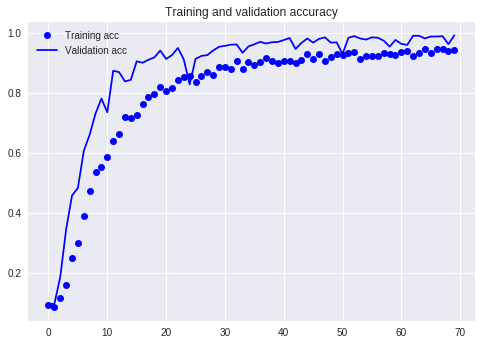

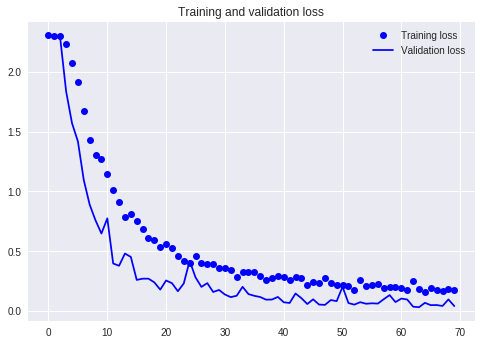

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

学習済みモデル sign_language_vgg16 はzipファイルに圧縮しダウンロードします。

In [8]:
#convert the vgg16 model into tf.js model
save_path = 'sign_language_vgg16'
tfjs.converters.save_keras_model(model, save_path)
print("[INFO] saved tf.js vgg16 model to disk..")

[INFO] saved tf.js vgg16 model to disk..


In [9]:
!zip -r sign_language_vgg16.zip sign_language_vgg16

  adding: sign_language_vgg16/ (stored 0%)
  adding: sign_language_vgg16/model.json (deflated 85%)
  adding: sign_language_vgg16/group1-shard2of2 (deflated 7%)
  adding: sign_language_vgg16/group1-shard1of2 (deflated 7%)


検証してみましょう

In [15]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

classes = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']

# path to test image
img_path = "hand_sign_digit_data/test/2/2_151.jpg"
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
pImg = np.expand_dims(img_array, axis=0)/255

model_path = 'sign_language_vgg16_1.h5'

sign_language_vgg16 = load_model(model_path)

prediction = sign_language_vgg16.predict(pImg)[0]

print(prediction)
print(np.argmax(prediction))

top_indices = prediction.argsort()[-5:][::-1]
result = [(classes[i] , prediction[i]) for i in top_indices]
for x in result:
    print(x)


[3.6742742e-05 4.8946025e-05 9.5853615e-01 1.4832568e-04 1.0519464e-09
 4.8510272e-18 4.0490225e-02 7.2048162e-04 1.8175120e-07 1.8952651e-05]
2
('two', 0.95853615)
('six', 0.040490225)
('seven', 0.0007204816)
('three', 0.00014832568)
('one', 4.8946025e-05)
